In [1]:
#https://github.com/OceanParcels/GlobalMassBudget/blob/main/create_population_input.py

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

In [2]:
import pandas as pd
import urllib.request as urlr

import shapely as sh
import cartopy.io.shapereader as shpreader

In [3]:
data_folder = '../../data/release/generated_files/'
coastal_df = pd.read_csv(data_folder+'coastal_population_MPW_NEMO0083.csv')
rivers_df = pd.read_csv(data_folder+'river_emissions_NEMO0083.csv')
fisheries_df = pd.read_csv(data_folder+'agg_data_fisheries_info.csv')

In [4]:
# Load in coast mask
data_mask_land = xr.open_dataset('../../data/output_data/masks/mask_land_NEMO0083.nc')
lats_land = data_mask_land['lat'].data[np.where(data_mask_land['mask_land'])]
lons_land = data_mask_land['lon'].data[np.where(data_mask_land['mask_land'])]

In [32]:
import cmocean

## Focus on coast first

In [33]:
#Non-zero
positive_plastic = coastal_df['MPW_Cell']>0

In [34]:
import matplotlib

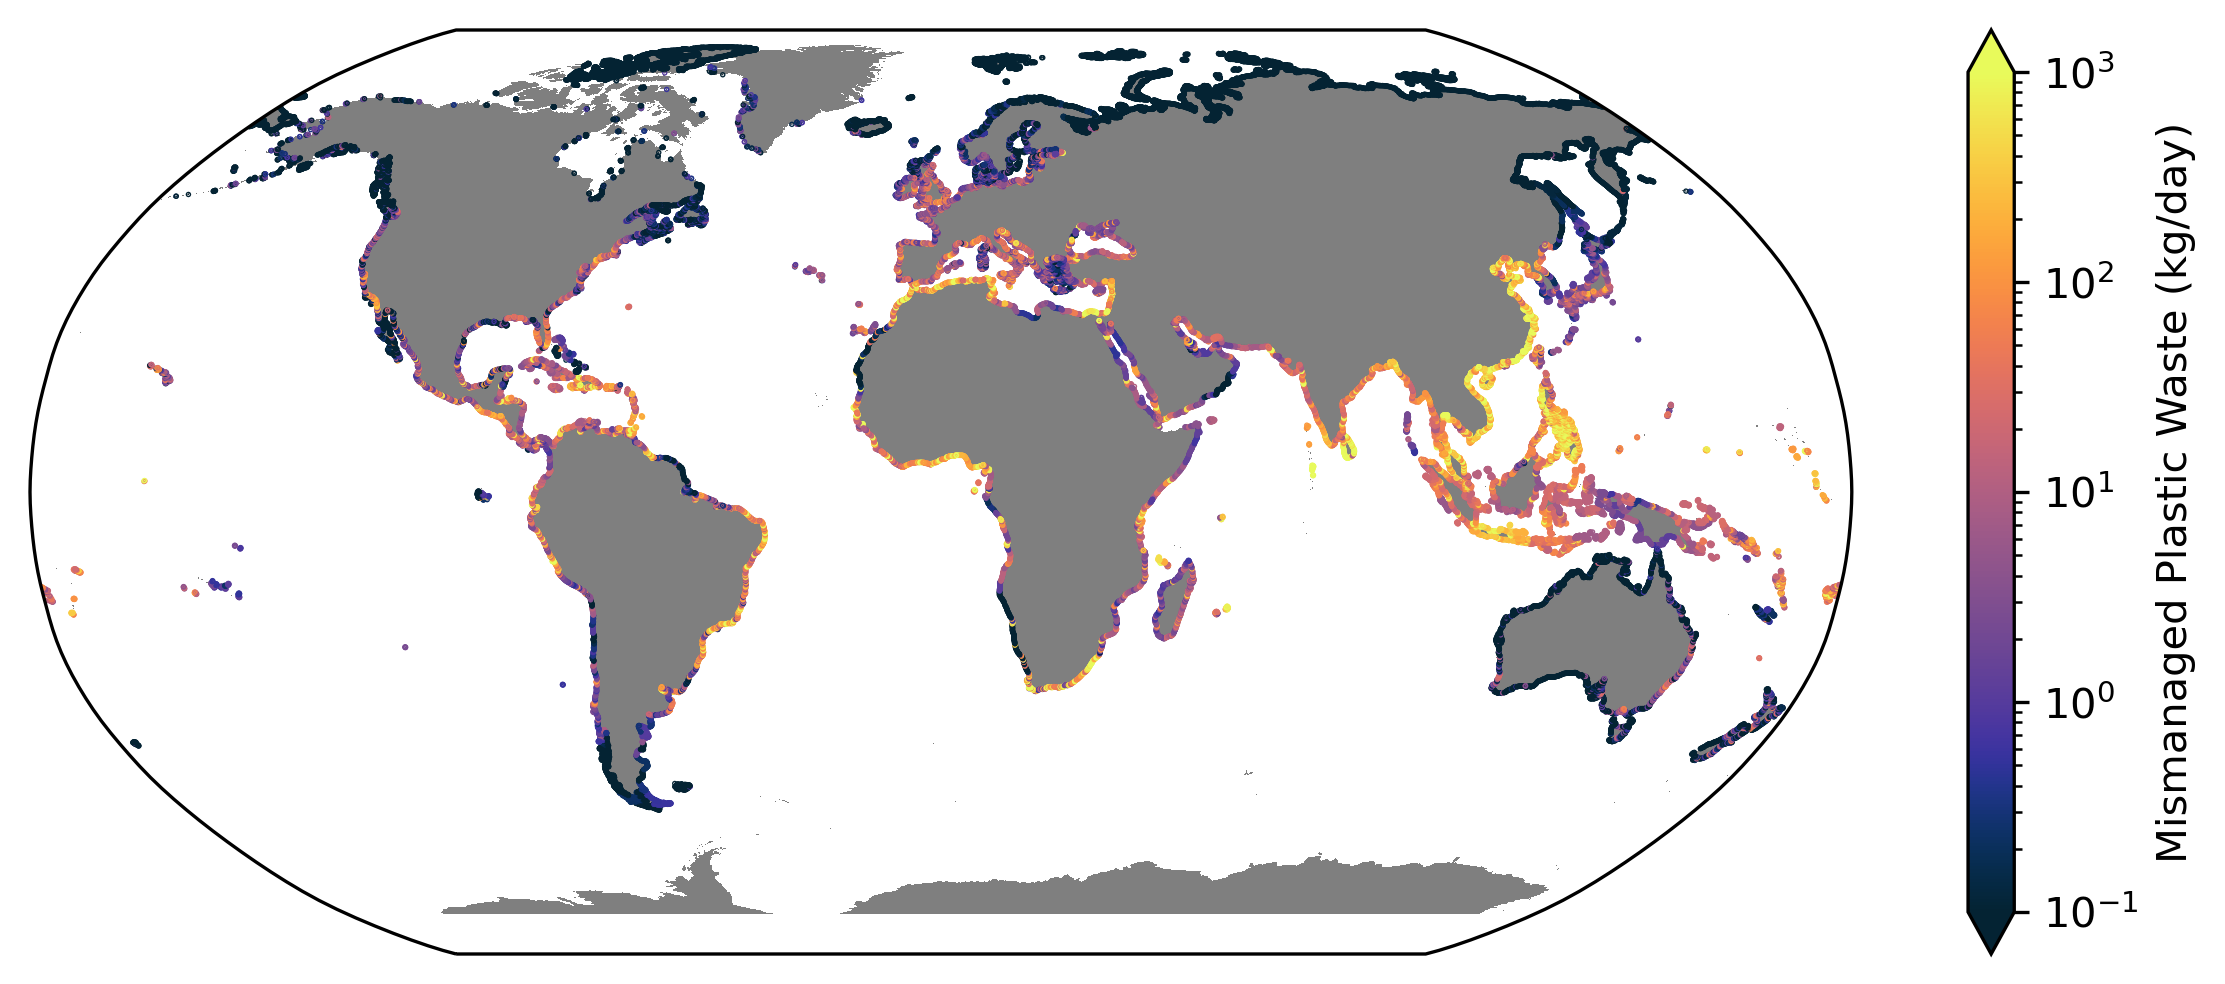

In [41]:
plt.figure(figsize=(10,4), dpi=300)
ax = plt.subplot(111, projection=ccrs.Robinson())
ax.pcolormesh(data_mask_land['lon'], data_mask_land['lat'], data_mask_land['mask_land'], cmap=plt.cm.binary, transform=ccrs.PlateCarree(), vmin=0, vmax=2)
#asia = (coastal_df['']== 'Asia')
cbar = ax.scatter(coastal_df['Longitude'][positive_plastic], coastal_df['Latitude'][positive_plastic], c=coastal_df['MPW_Cell'][positive_plastic],
                  s=0.1, cmap=cmocean.cm.thermal, transform=ccrs.PlateCarree(), norm=matplotlib.colors.LogNorm(vmin=1e-1, vmax=1e3))

cbar_name = plt.colorbar(cbar, extend='both')
cbar_name.set_label("Mismanaged Plastic Waste (kg/day)")

plt.show()


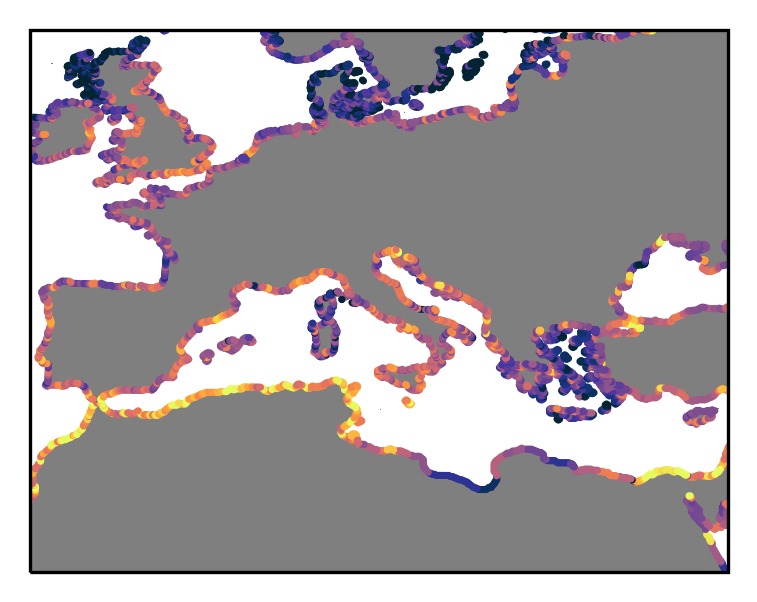

In [45]:
plt.figure(figsize=(3,3), dpi=300)
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.pcolormesh(data_mask_land['lon'], data_mask_land['lat'], data_mask_land['mask_land'], cmap=plt.cm.binary, transform=ccrs.PlateCarree(), vmin=0, vmax=2)
#asia = (coastal_df['']== 'Asia')
cbar = ax.scatter(coastal_df['Longitude'][positive_plastic], coastal_df['Latitude'][positive_plastic], c=coastal_df['MPW_Cell'][positive_plastic],
                  s=0.5, cmap=cmocean.cm.thermal, transform=ccrs.PlateCarree(), norm=matplotlib.colors.LogNorm(vmin=1e-1, vmax=1e3))
ax.set_extent([-10,35,25,60], crs=ccrs.PlateCarree() )
#cbar_name = plt.colorbar(cbar, extend='both')
#cbar_name.set_label("Mismanaged Plastic Waste (kg/day)")

plt.show()


In [23]:
rivers_df

Unnamed: 0 Continent   Region                  Subregion  \
0               0   Oceania  Oceania  Australia and New Zealand   
1               1   Oceania  Oceania  Australia and New Zealand   
2               2   Oceania  Oceania  Australia and New Zealand   
3               3   Oceania  Oceania  Australia and New Zealand   
4               4   Oceania  Oceania  Australia and New Zealand   
...           ...       ...      ...                        ...   
31814       31814    Europe   Europe             Eastern Europe   
31815       31815    Europe   Europe             Eastern Europe   
31816       31816    Europe   Europe             Eastern Europe   
31817       31817    Europe   Europe             Eastern Europe   
31818       31818    Europe   Europe             Eastern Europe   

                  Country   Longitude   Latitude  Emissions  
0             New Zealand  168.833333 -46.569603   0.164904  
1             New Zealand  168.333333 -46.454902   0.124932  
2             New Zealand  168.333333 -46.454902   1.213370  
3             New Zealand  168.000000 -46.339961   0.121138  
4             New Zealand  169.833333 -46.397461   0.197533  
...                   ...         ...        ...        ...  
31814  Russian Federation  158.768783  52.970829   3.937440  
31815  Russian Federation  158.598172  52.908962   3.821710  
31816  Russian Federation  158.768783  52.970829   9.836130  
31817  Russian Federation  158.598172  52.908962   1.693040  
31818  Russian Federation  143.016093  53.637712   1.886280  

[31819 rows x 8 columns]

In [46]:
#Non-zero
positive_plastic = rivers_df['Emissions']>0

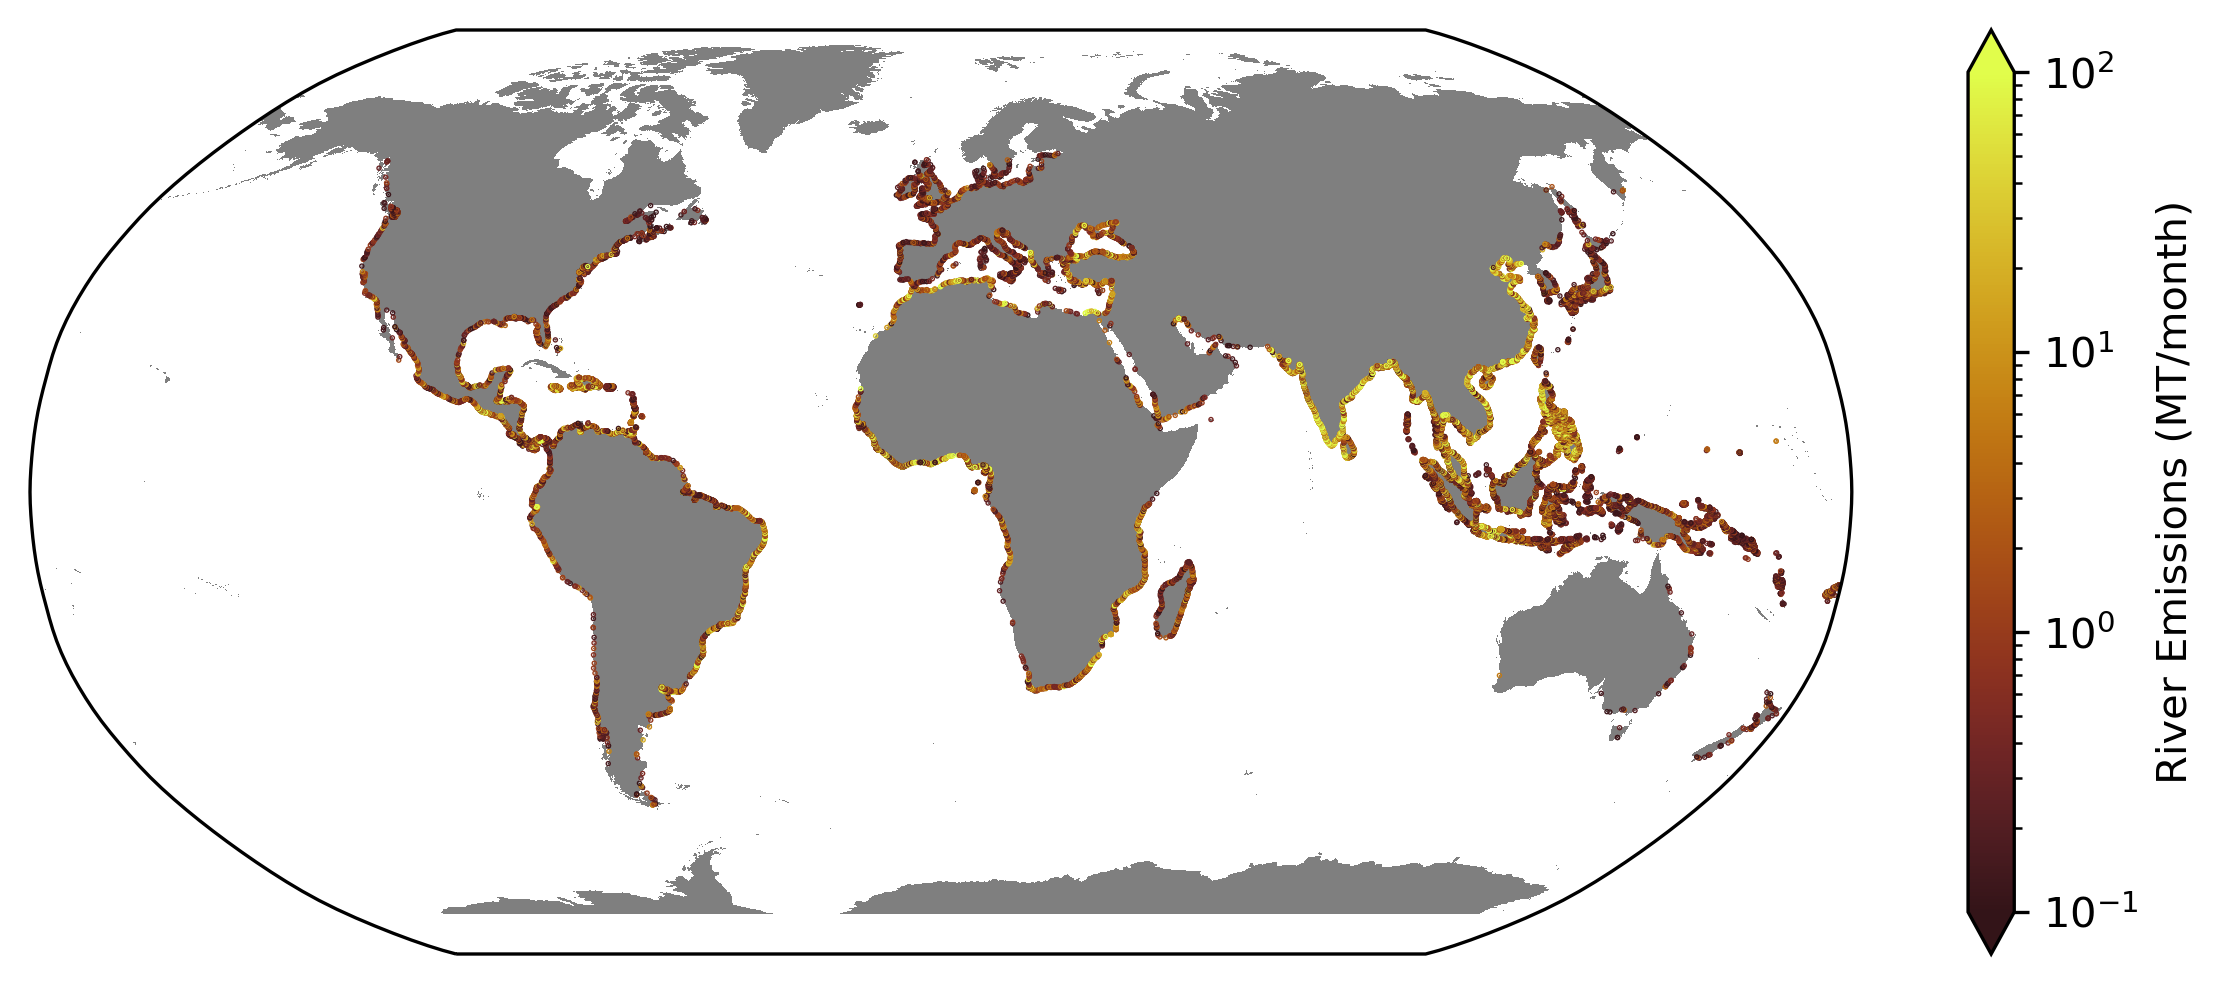

In [49]:
plt.figure(figsize=(10,4), dpi=300)
ax = plt.subplot(111, projection=ccrs.Robinson())
ax.pcolormesh(data_mask_land['lon'], data_mask_land['lat'], data_mask_land['mask_land'], cmap=plt.cm.binary, transform=ccrs.PlateCarree(), vmin=0, vmax=2)
#asia = (coastal_df['']== 'Asia')
cbar = ax.scatter(rivers_df['Longitude'][positive_plastic], rivers_df['Latitude'][positive_plastic], c=rivers_df['Emissions'][positive_plastic],
                  s=0.1, cmap=cmocean.cm.solar, transform=ccrs.PlateCarree(), norm=matplotlib.colors.LogNorm(vmin=1e-1, vmax=1e2))

cbar_name = plt.colorbar(cbar, extend='both')
cbar_name.set_label("River Emissions (MT/month)")

plt.show()


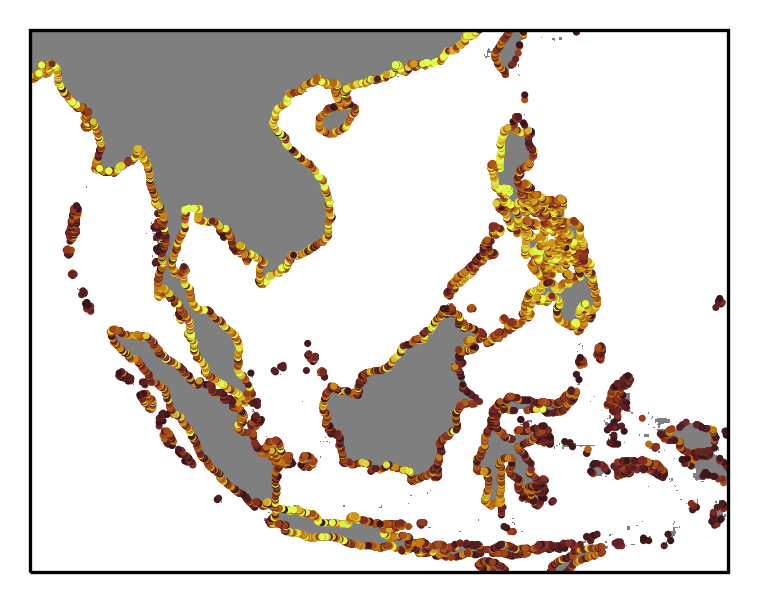

In [52]:
plt.figure(figsize=(3,3), dpi=300)
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.pcolormesh(data_mask_land['lon'], data_mask_land['lat'], data_mask_land['mask_land'], cmap=plt.cm.binary, transform=ccrs.PlateCarree(), vmin=0, vmax=2)
#asia = (coastal_df['']== 'Asia')
cbar = ax.scatter(rivers_df['Longitude'][positive_plastic], rivers_df['Latitude'][positive_plastic], c=rivers_df['Emissions'][positive_plastic],
                  s=0.5, cmap=cmocean.cm.solar, transform=ccrs.PlateCarree(), norm=matplotlib.colors.LogNorm(vmin=1e-1, vmax=1e2))
ax.set_extent([90,135,-10,25], crs=ccrs.PlateCarree() )
#cbar_name = plt.colorbar(cbar, extend='both')
#cbar_name.set_label("Mismanaged Plastic Waste (kg/day)")

plt.show()


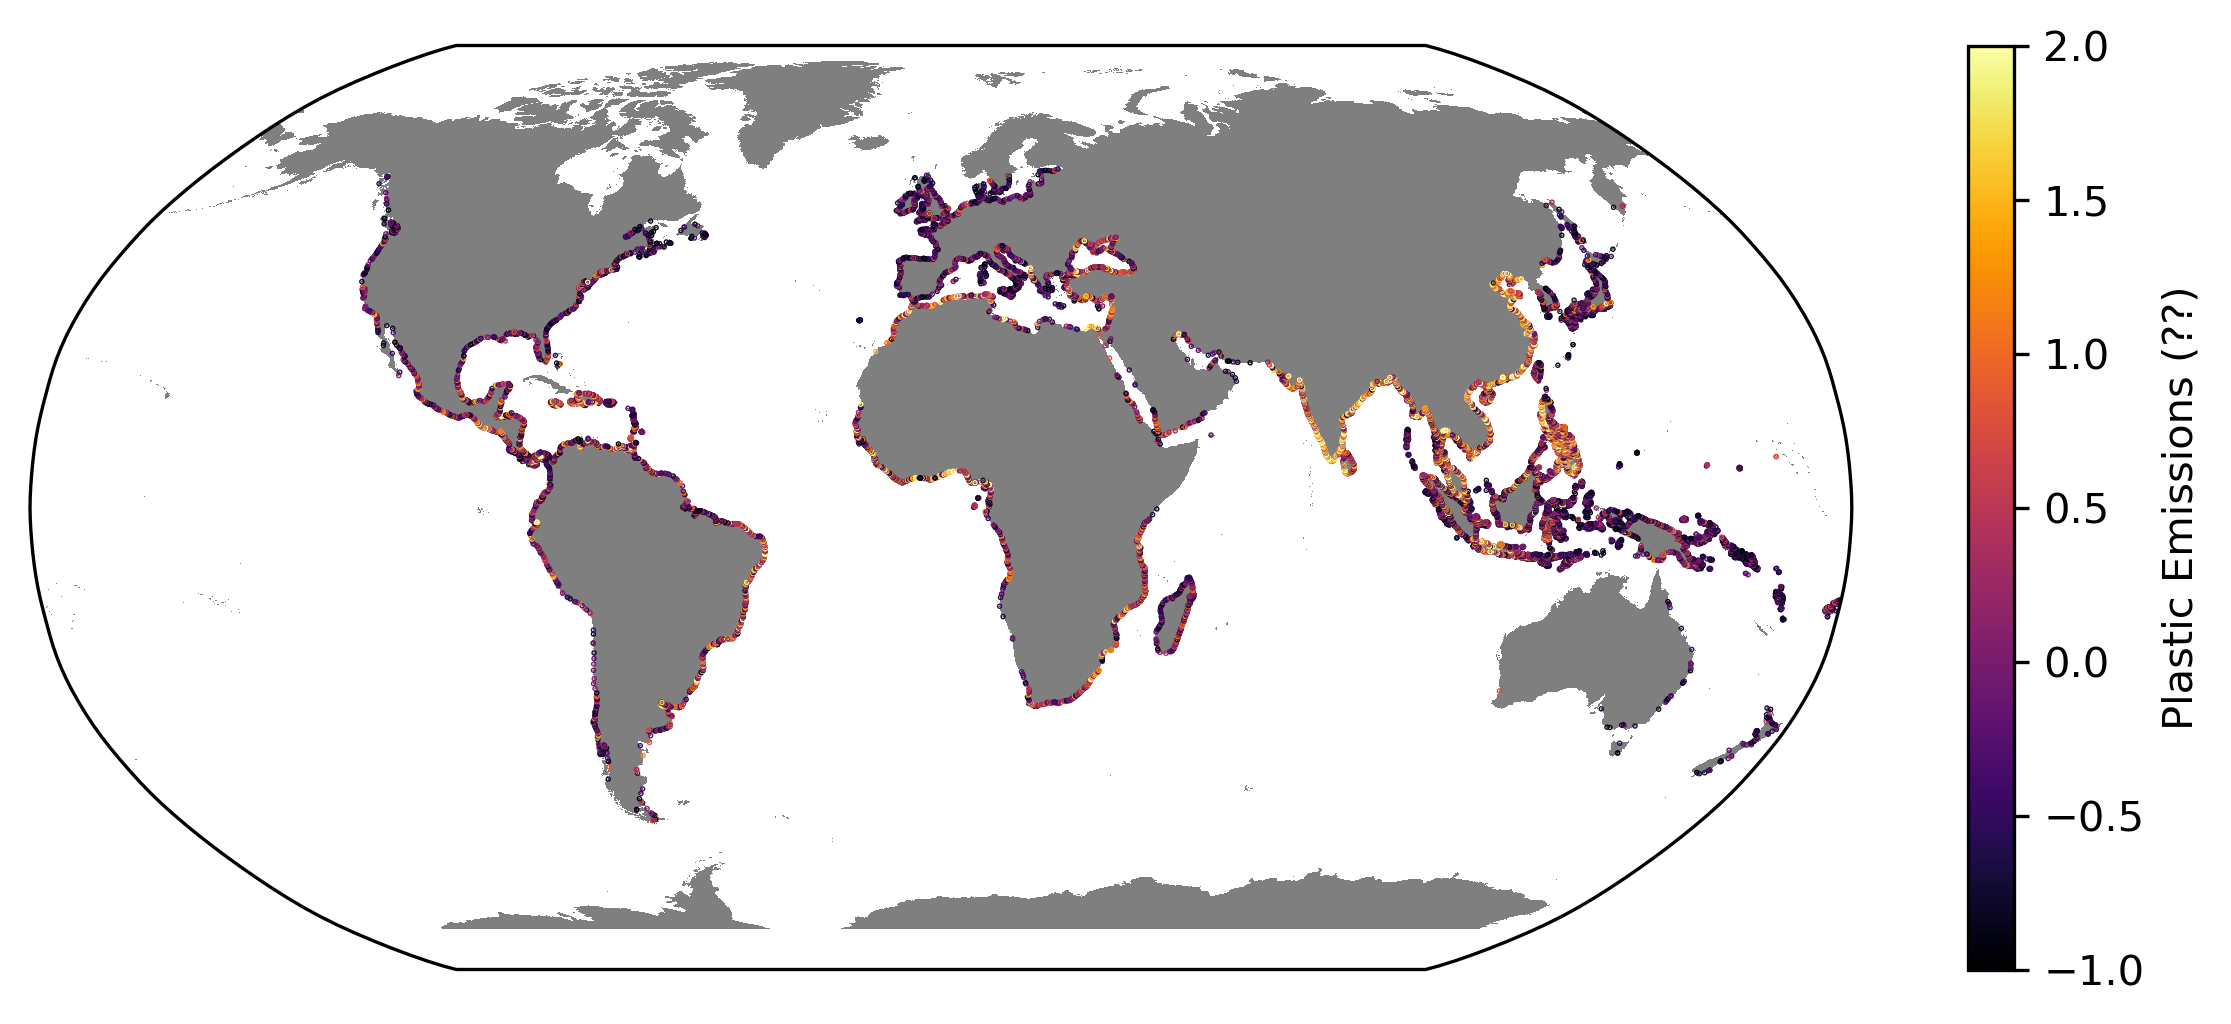

In [25]:
plt.figure(figsize=(10,4), dpi=300)
ax = plt.subplot(111, projection=ccrs.Robinson())
ax.pcolormesh(data_mask_land['lon'], data_mask_land['lat'], data_mask_land['mask_land'], cmap=plt.cm.binary, transform=ccrs.PlateCarree(), vmin=0, vmax=2)
#asia = (coastal_df['']== 'Asia')
cbar = ax.scatter(rivers_df['Longitude'][positive_plastic], rivers_df['Latitude'][positive_plastic], c=np.log10(rivers_df['Emissions'][positive_plastic]), s=0.1, vmin=-1, vmax=2, cmap=plt.cm.inferno, transform=ccrs.PlateCarree())

cbar_name = plt.colorbar(cbar)
cbar_name.set_label("River Emissions (MT/month)")

plt.show()


In [26]:
fisheries_df

Unnamed: 0  Latitude  Longitude flag       geartype       month  \
0                  0    -77.84    -177.56  NZL  set_longlines  2020-01-01   
1                  1    -77.83    -177.66  NZL  set_longlines  2020-01-01   
2                  2    -77.83    -177.65  NZL  set_longlines  2020-01-01   
3                  3    -77.83    -177.57  NZL  set_longlines  2020-01-01   
4                  4    -77.83    -177.56  NZL  set_longlines  2020-01-01   
...              ...       ...        ...  ...            ...         ...   
54437360    54437360     81.69      35.01  EST       trawlers  2020-10-01   
54437361    54437361     81.69      35.03  EST       trawlers  2020-09-01   
54437362    54437362     81.69      35.03  EST       trawlers  2020-10-01   
54437363    54437363     81.70      34.70  EST       trawlers  2020-11-01   
54437364    54437364     81.70      34.71  EST       trawlers  2020-11-01   

          fishing_hours Continent   Region                  Subregion  \
0                0.0336   Oceania  Oceania  Australia and New Zealand   
1                0.0830   Oceania  Oceania  Australia and New Zealand   
2                0.9102   Oceania  Oceania  Australia and New Zealand   
3                0.0836   Oceania  Oceania  Australia and New Zealand   
4                0.0652   Oceania  Oceania  Australia and New Zealand   
...                 ...       ...      ...                        ...   
54437360         0.0333    Europe   Europe            Northern Europe   
54437361         0.0175    Europe   Europe            Northern Europe   
54437362         0.0188    Europe   Europe            Northern Europe   
54437363         0.0499    Europe   Europe            Northern Europe   
54437364         0.0275    Europe   Europe            Northern Europe   

              Country  
0         New Zealand  
1         New Zealand  
2         New Zealand  
3         New Zealand  
4         New Zealand  
...               ...  
54437360      Estonia  
54437361      Estonia  
54437362      Estonia  
54437363      Estonia  
54437364      Estonia  

[54437365 rows x 11 columns]

In [53]:
#Non-zero
positive_plastic = fisheries_df['fishing_hours']>0

In [54]:
positive_plastic

0           True
1           True
2           True
3           True
4           True
            ... 
54437360    True
54437361    True
54437362    True
54437363    True
54437364    True
Name: fishing_hours, Length: 54437365, dtype: bool

In [61]:
fisheries_df

Unnamed: 0  Latitude  Longitude flag       geartype       month  \
0                  0    -77.84    -177.56  NZL  set_longlines  2020-01-01   
1                  1    -77.83    -177.66  NZL  set_longlines  2020-01-01   
2                  2    -77.83    -177.65  NZL  set_longlines  2020-01-01   
3                  3    -77.83    -177.57  NZL  set_longlines  2020-01-01   
4                  4    -77.83    -177.56  NZL  set_longlines  2020-01-01   
...              ...       ...        ...  ...            ...         ...   
54437360    54437360     81.69      35.01  EST       trawlers  2020-10-01   
54437361    54437361     81.69      35.03  EST       trawlers  2020-09-01   
54437362    54437362     81.69      35.03  EST       trawlers  2020-10-01   
54437363    54437363     81.70      34.70  EST       trawlers  2020-11-01   
54437364    54437364     81.70      34.71  EST       trawlers  2020-11-01   

          fishing_hours Continent   Region                  Subregion  \
0                0.0336   Oceania  Oceania  Australia and New Zealand   
1                0.0830   Oceania  Oceania  Australia and New Zealand   
2                0.9102   Oceania  Oceania  Australia and New Zealand   
3                0.0836   Oceania  Oceania  Australia and New Zealand   
4                0.0652   Oceania  Oceania  Australia and New Zealand   
...                 ...       ...      ...                        ...   
54437360         0.0333    Europe   Europe            Northern Europe   
54437361         0.0175    Europe   Europe            Northern Europe   
54437362         0.0188    Europe   Europe            Northern Europe   
54437363         0.0499    Europe   Europe            Northern Europe   
54437364         0.0275    Europe   Europe            Northern Europe   

              Country  
0         New Zealand  
1         New Zealand  
2         New Zealand  
3         New Zealand  
4         New Zealand  
...               ...  
54437360      Estonia  
54437361      Estonia  
54437362      Estonia  
54437363      Estonia  
54437364      Estonia  

[54437365 rows x 11 columns]

In [62]:
fisheries_agg = fisheries_df.groupby(["Latitude", "Longitude"])['fishing_hours'].agg('sum').reset_index()

In [63]:
plt.figure(figsize=(10,4), dpi=300)
ax = plt.subplot(111, projection=ccrs.Robinson())
ax.pcolormesh(data_mask_land['lon'], data_mask_land['lat'], data_mask_land['mask_land'], cmap=plt.cm.binary, transform=ccrs.PlateCarree(), vmin=0, vmax=2)
#asia = (coastal_df['']== 'Asia')
cbar = ax.scatter(fisheries_agg['Longitude'][positive_plastic], fisheries_agg['Latitude'][positive_plastic], c=np.log10(fisheries_agg['fishing_hours'][positive_plastic]), s=0.1, vmin=-1, vmax=2, cmap=plt.cm.Spectral_r, transform=ccrs.PlateCarree())

cbar_name = plt.colorbar(cbar)
cbar_name.set_label("Fishing hours (2020)")

plt.show()


KeyboardInterrupt: 

In [66]:
fisheries_agg['fishing_hours'].max()

9694.758

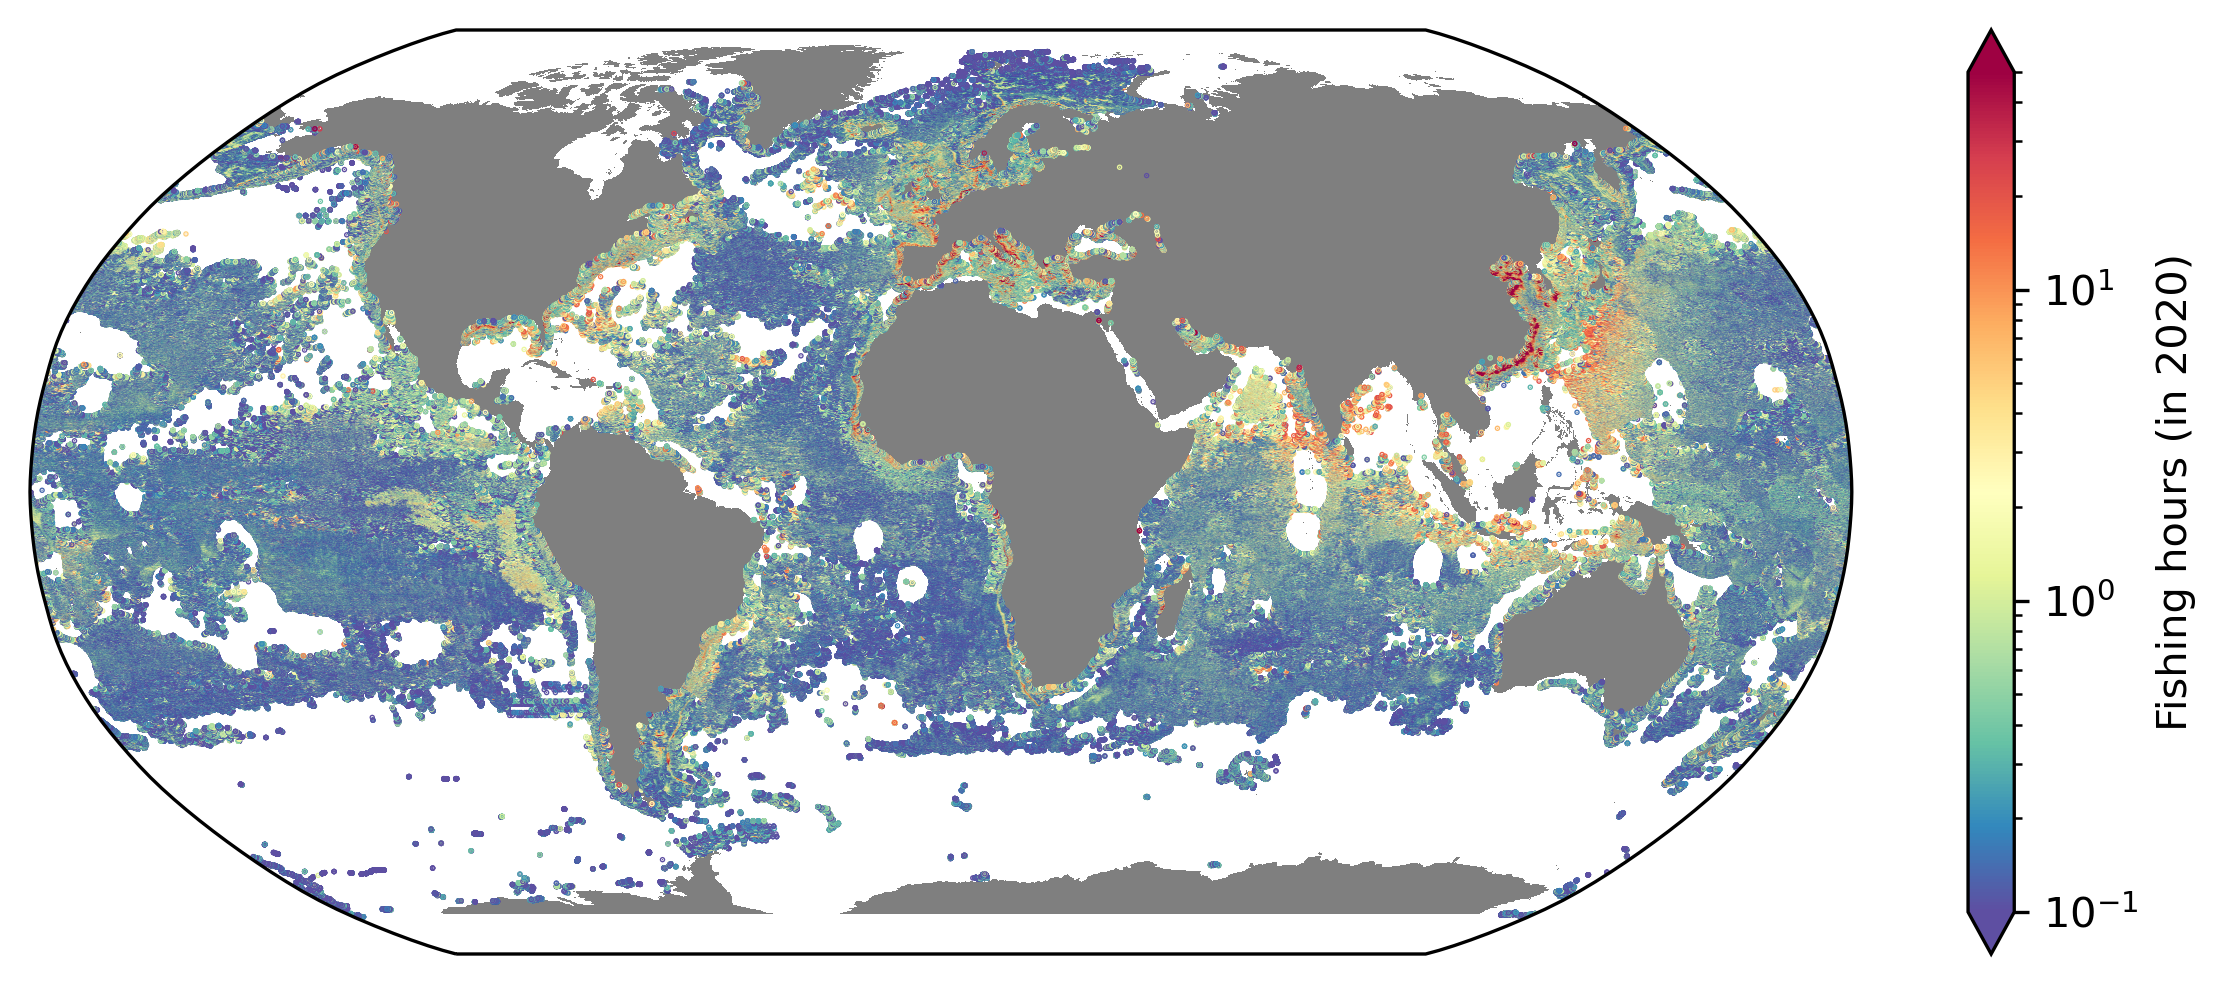

In [64]:
plt.figure(figsize=(10,4), dpi=300)
ax = plt.subplot(111, projection=ccrs.Robinson())
ax.pcolormesh(data_mask_land['lon'], data_mask_land['lat'], data_mask_land['mask_land'], cmap=plt.cm.binary, transform=ccrs.PlateCarree(), vmin=0, vmax=2)
#asia = (coastal_df['']== 'Asia')
cbar = ax.scatter(fisheries_agg['Longitude'][positive_plastic], fisheries_agg['Latitude'][positive_plastic], c=fisheries_agg['fishing_hours'][positive_plastic],
                  s=0.1, cmap=plt.cm.Spectral_r, transform=ccrs.PlateCarree(), norm=matplotlib.colors.LogNorm(vmin=1e-1, vmax=5e1))

cbar_name = plt.colorbar(cbar, extend='both')
cbar_name.set_label("Fishing hours (in 2020)")

plt.show()


In [71]:
coastal_df['Country'] == country

0        False
1        False
2        False
3        False
4        False
         ...  
87854    False
87855    False
87856    False
87857    False
87858    False
Name: Country, Length: 87859, dtype: bool

In [80]:
## Use cases
country = 'Greece'
keep = (coastal_df['Country'] == country) * (coastal_df['MPW_Cell']>0)


In [81]:
keep

0        False
1        False
2        False
3        False
4        False
         ...  
87854    False
87855    False
87856    False
87857    False
87858    False
Length: 87859, dtype: bool

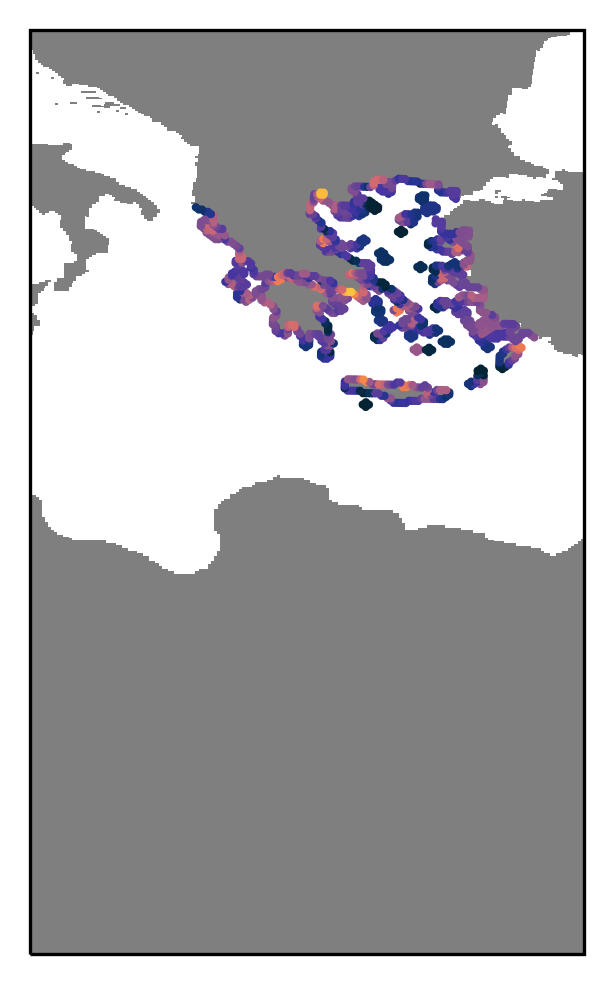

In [86]:
plt.figure(figsize=(10,4), dpi=300)
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.pcolormesh(data_mask_land['lon'], data_mask_land['lat'], data_mask_land['mask_land'], cmap=plt.cm.binary, transform=ccrs.PlateCarree(), vmin=0, vmax=2)
#asia = (coastal_df['']== 'Asia')
cbar = ax.scatter(coastal_df['Longitude'][keep], coastal_df['Latitude'][keep], c=coastal_df['MPW_Cell'][keep],
                  s=1, cmap=cmocean.cm.thermal, transform=ccrs.PlateCarree(), norm=matplotlib.colors.LogNorm(vmin=1e-1, vmax=1e3))

#cbar_name = plt.colorbar(cbar, extend='both')
#cbar_name.set_label("Mismanaged Plastic Waste (kg/day)")
ax.set_extent([15,30,20,45], crs=ccrs.PlateCarree())
plt.show()


In [88]:
import xarray as xr

In [89]:
pfile = xr.open_zarr('../../data/output_data/trajectory/advanced_release.zarr')

In [100]:
cmap = cmocean.cm.thermal

In [117]:
norm=matplotlib.colors.LogNorm(vmin=1e-1, vmax=1e3)

In [119]:
norm(1.5)

0.29402281476392034

In [101]:
cmap(0)

(0.015556013331540799, 0.13824424546464084, 0.2018108864558305, 1.0)

In [104]:
max_val = coastal_df['MPW_Cell'][keep].max()

In [106]:
pfile["lon"].T.shape

(120, 1040)

In [107]:
keep

0        False
1        False
2        False
3        False
4        False
         ...  
87854    False
87855    False
87856    False
87857    False
87858    False
Length: 87859, dtype: bool

In [115]:
keep_waste = np.array(coastal_df['MPW_Cell'][keep])

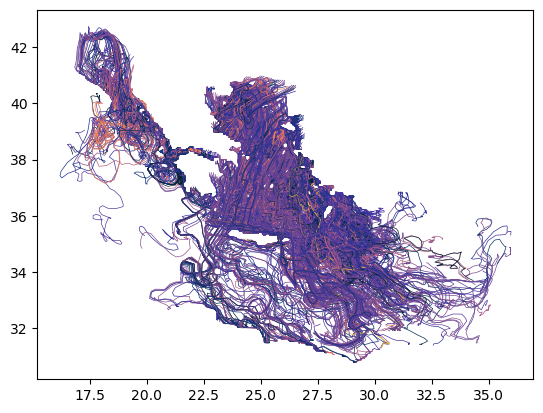

In [120]:
for traj in range(pfile["lon"].T.shape[1]):
    waste = keep_waste[traj]
    plt.plot(pfile["lon"].T[:,traj], pfile["lat"].T[:,traj], color=cmap(norm(waste)), linewidth=0.5)
plt.show()

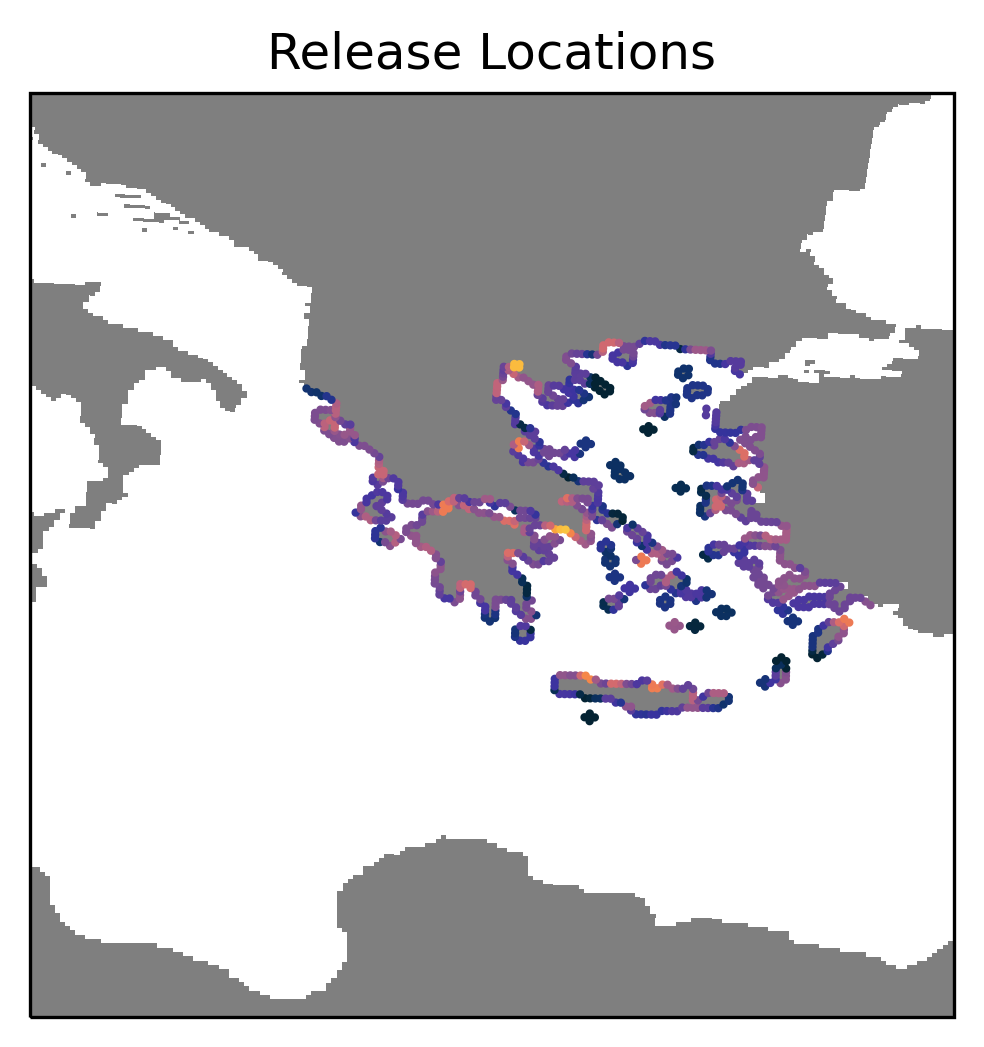

In [126]:
plt.figure(figsize=(10,4), dpi=300)
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.pcolormesh(data_mask_land['lon'], data_mask_land['lat'], data_mask_land['mask_land'], cmap=plt.cm.binary, transform=ccrs.PlateCarree(), vmin=0, vmax=2)
#asia = (coastal_df['']== 'Asia')
cbar = ax.scatter(coastal_df['Longitude'][keep], coastal_df['Latitude'][keep], c=coastal_df['MPW_Cell'][keep],
                  s=1, cmap=cmocean.cm.thermal, transform=ccrs.PlateCarree(), norm=matplotlib.colors.LogNorm(vmin=1e-1, vmax=1e3))

#cbar_name = plt.colorbar(cbar, extend='both')
#cbar_name.set_label("Mismanaged Plastic Waste (kg/day)")
ax.set_extent([15,30,30,45], crs=ccrs.PlateCarree())
ax.set_title("Release Locations")
plt.show()


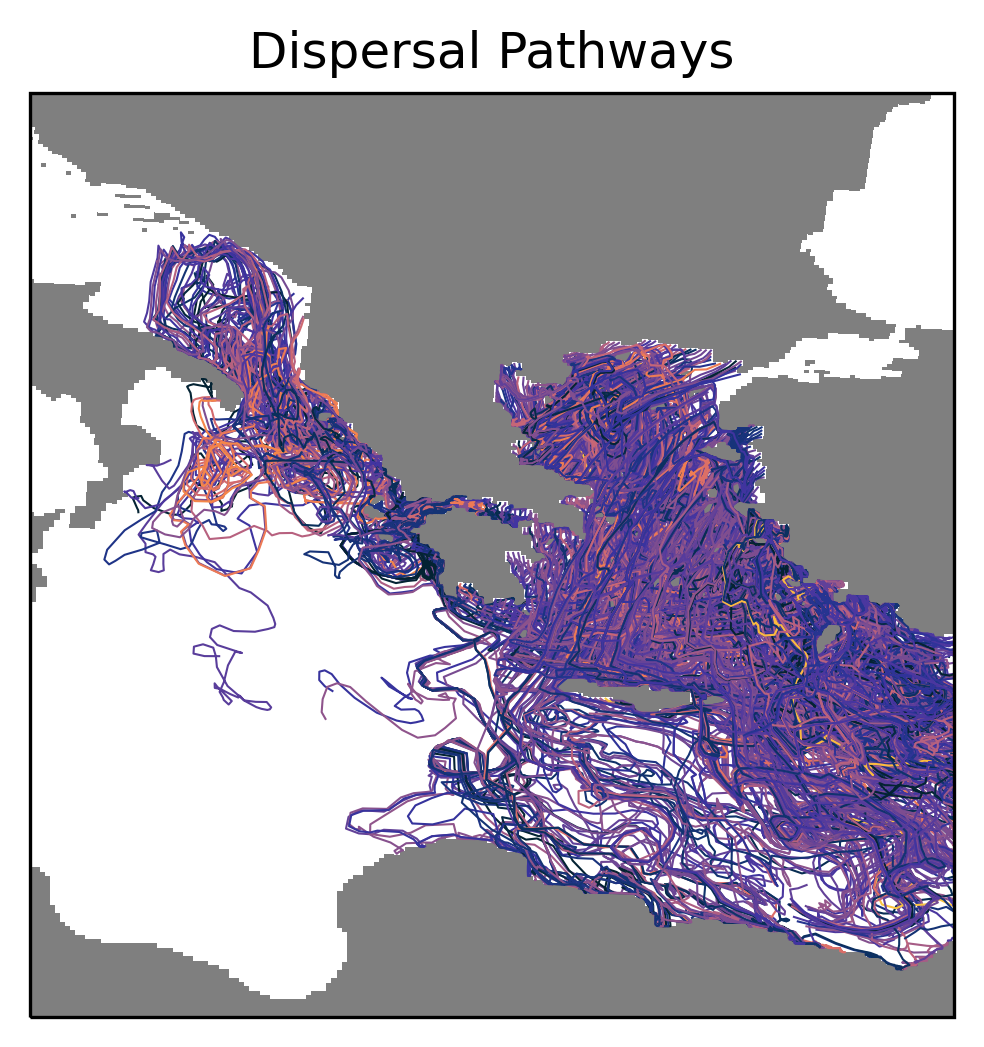

In [125]:
plt.figure(figsize=(10,4), dpi=300)
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.pcolormesh(data_mask_land['lon'], data_mask_land['lat'], data_mask_land['mask_land'], cmap=plt.cm.binary, transform=ccrs.PlateCarree(), vmin=0, vmax=2)
#asia = (coastal_df['']== 'Asia')
for traj in range(pfile["lon"].T.shape[1]):
    waste = keep_waste[traj]
    plt.plot(pfile["lon"].T[:,traj], pfile["lat"].T[:,traj], color=cmap(norm(waste)), linewidth=0.5)
#cbar_name = plt.colorbar(cbar, extend='both')
#cbar_name.set_label("Mismanaged Plastic Waste (kg/day)")
ax.set_extent([15,30,30,45], crs=ccrs.PlateCarree())
ax.set_title("Dispersal Pathways")
plt.show()


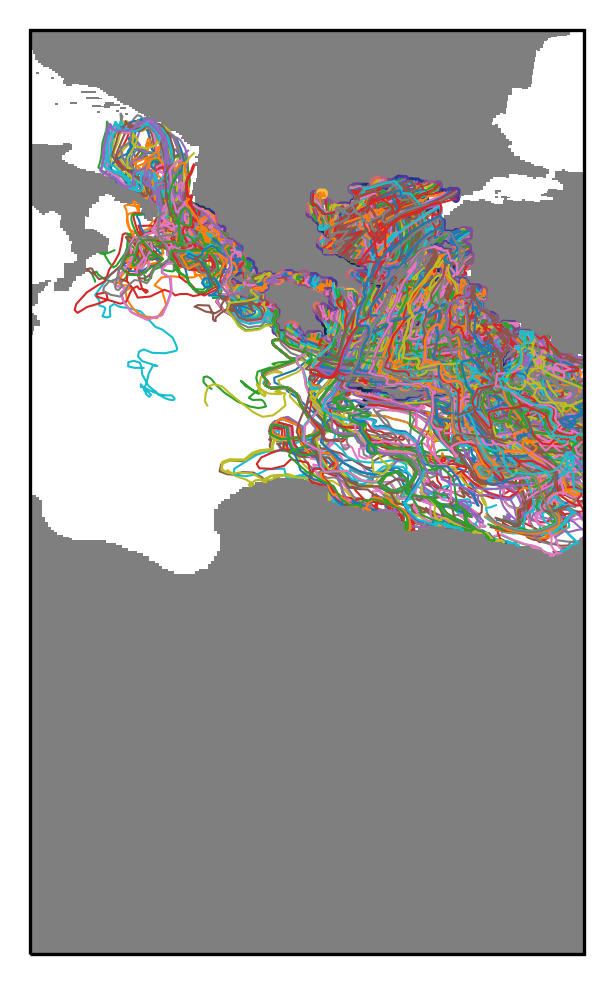

In [99]:
plt.figure(figsize=(10,4), dpi=300)
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.pcolormesh(data_mask_land['lon'], data_mask_land['lat'], data_mask_land['mask_land'], cmap=plt.cm.binary, transform=ccrs.PlateCarree(), vmin=0, vmax=2)
#asia = (coastal_df['']== 'Asia')
cbar = ax.scatter(coastal_df['Longitude'][keep], coastal_df['Latitude'][keep], c=coastal_df['MPW_Cell'][keep],
                  s=1, cmap=cmocean.cm.thermal, transform=ccrs.PlateCarree(), norm=matplotlib.colors.LogNorm(vmin=1e-1, vmax=1e3))

#cbar_name = plt.colorbar(cbar, extend='both')
#cbar_name.set_label("Mismanaged Plastic Waste (kg/day)")

ax.plot(pfile["lon"].T, pfile["lat"].T, linewidth=0.5)

ax.set_extent([15,30,20,45], crs=ccrs.PlateCarree())
plt.show()
